In [54]:
import pandas as pd

df = pd.read_csv('data/heights.csv')
df

,name,height
0,mohan,1.2
1,maria,2.3
2,sakib,4.9
3,tao,5.1
4,virat,5.2
5,khusbu,5.4
6,dmitry,5.5
7,selena,5.5
8,john,5.6
9,imran,5.6


In [55]:
df.describe()

,height
count,20.000000
mean,8.390000
std,8.782812
min,1.200000
25%,5.350000
50%,5.700000
75%,6.275000
max,40.200000


# Outlier detection using IQR

In [56]:
Q1 = df.height.quantile(0.25)
Q3 = df.height.quantile(0.75)
IQR = Q3 - Q1

In [57]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR

df[(df.height<lower_limit) | (df.height>upper_limit)]

,name,height
0,mohan,1.2
1,maria,2.3
17,aamir,14.5
18,ken,23.2
19,Liu,40.2


In [58]:
df = df[(df.height > lower_limit) & (df.height < upper_limit)]

In [59]:
df

,name,height
2,sakib,4.9
3,tao,5.1
4,virat,5.2
5,khusbu,5.4
6,dmitry,5.5
7,selena,5.5
8,john,5.6
9,imran,5.6
10,jose,5.8
11,deepika,5.9


# Outlier detection and removal using upper and lower limits

In [60]:
df = pd.read_csv("data/weight-height.csv")
df = df["Height"].to_frame()
df.sample(5)

,Height
67,72.765370
4467,68.117809
7046,67.511362
6594,68.014391
7418,67.674463


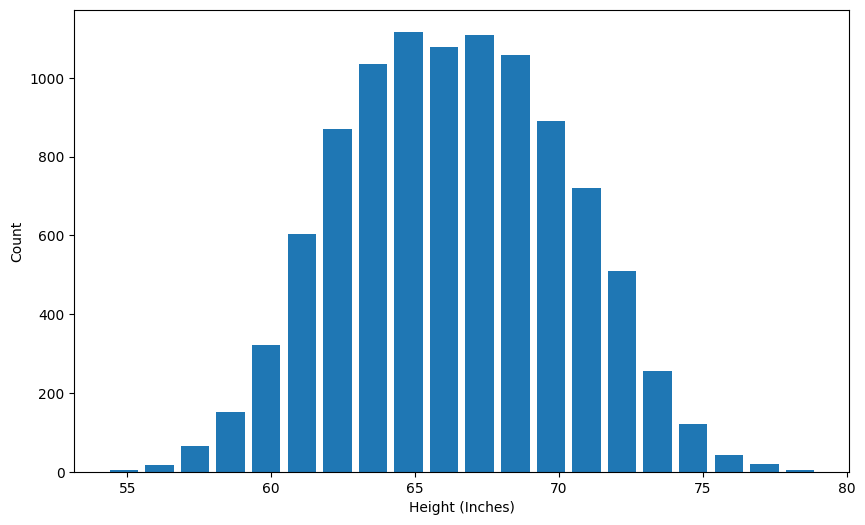

In [61]:
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10,6)

plt.hist(df, bins=20, rwidth=0.8)
plt.xlabel('Height (Inches)')
plt.ylabel('Count')
plt.show()

In [62]:
df["Height"].mean()

np.float64(66.36755975482124)

In [63]:
df["Height"].std()

3.8475281207732324

In [64]:
upper_limit = df["Height"].mean() + 3 * df["Height"].std()
lower_limit = df["Height"].mean() - 3 * df["Height"].std()

upper_limit
lower_limit

np.float64(54.82497539250154)

In [71]:
df = df[(df["Height"] < upper_limit) | (df["Height"] > lower_limit)]
df

,Height
0,73.847017
1,68.781904
2,74.110105
3,71.730978
4,69.881796
...,...
9995,66.172652
9996,67.067155
9997,63.867992
9998,69.034243


In [72]:
df.shape[0]

10000

# Using Z score

In [75]:
df = pd.read_csv("data/weight-height.csv")
df = df["Height"].to_frame()

mean = df["Height"].mean()
std = df["Height"].std()
df["z_score"] = (df["Height"] - mean)/std
df

,Height,z_score
0,73.847017,1.943964
1,68.781904,0.627505
2,74.110105,2.012343
3,71.730978,1.393991
4,69.881796,0.913375
...,...,...
9995,66.172652,-0.050658
9996,67.067155,0.181830
9997,63.867992,-0.649655
9998,69.034243,0.693090


In [80]:
outlier_removed_df_using_z_score = df[df["z_score"] < 3]
number_of_removed_outliers = df.shape[0] - outlier_removed_df_using_z_score.shape[0]
print(f"Number of outliers removed: {number_of_removed_outliers}")

Number of outliers removed: 5
